# Cvičení 3: Optimalizace, metoda nejměnších čtverců a rozpoznávání not

V tomto cvičení si ukážeme malou ukázku optimalizačních úloh. Ukážeme si metodu nejmenších čtverců a její využití při rozpoznávání not.

---

## Část 1: Motivační Slovní Úloha: Optimalizace Cen a Výrobních Nákladů Limonády

Vlastníte stánek s limonádou a chcete optimalizovat cenu za sklenici, aby se maximalizoval váš zisk. Na základě vašich zkušeností jste zjistili, že počet prodaných limonád $ q $ v závislosti na ceně $ p $ (v korunách) lze aproximovat takto:
$$ q(p) = \left\lfloor 1000 \exp\left(-\left(\frac{p}{10}\right)^2\right) \right\rfloor $$


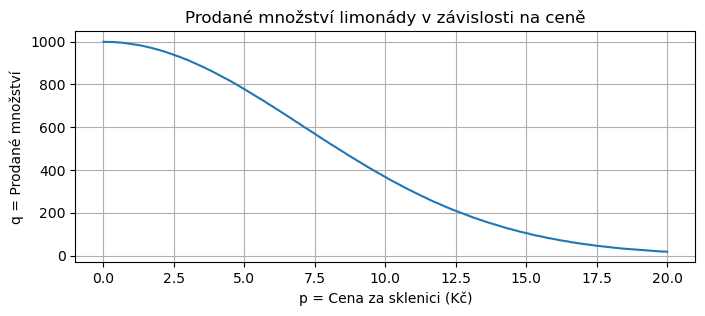

In [1]:
# Importování knihoven
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0, 20, 200)
q = np.floor(1000 * np.exp(-(p / 10)**2))

# vykreslení grafu
plt.figure(figsize=(8, 3))
plt.plot(p, q)
plt.xlabel('p = Cena za sklenici (Kč)')  # Zvětšení popisku osy x
plt.ylabel('q = Prodané množství')  # Zvětšení popisku oy
plt.title('Prodané množství limonády v závislosti na ceně')
plt.grid(True)  # Zapnutí mřížky
plt.show()





Výrobní náklady na jednu sklenici limonády $ c $ závisí na množství vyrobeného množství $ q $ a jsou dány vztahem:
$$ c(q) = 5 + 15 \exp\left(-\frac{q}{200}\right) $$


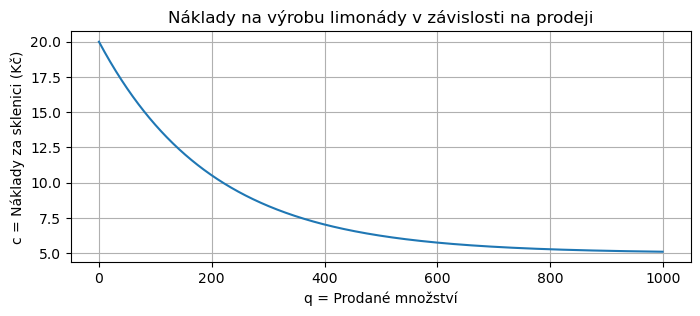

In [2]:
q = np.arange(0, 1000)
c = 5 + 15 * np.exp(-q / 200)

plt.figure(figsize=(8, 3))
plt.plot(q, c)
plt.xlabel('q = Prodané množství')
plt.ylabel('c = Náklady za sklenici (Kč)')
plt.title('Náklady na výrobu limonády v závislosti na prodeji')
plt.grid(True)
plt.show()


**`Cílem je nalézt optimální cenu za sklenici limonády tak, aby se maximalizoval celkový zisk.`**

#### Formulace Optimalizačního Problému
Zisk za sklenici $ z $ je rozdíl mezi cenou a výrobními náklady, tedy:
$$ z = p - c $$

tedy:
$$ z(p) = p - c(q(p)) $$

Celkový zisk $ t $ z prodeje limonády je součin zisku za sklenici a množství prodaných sklenic. Zde je třeba poznamenat, že předpokládáme, že všechny sklenice které vyrobíme, také prodáme, tedy:
$$ t(p) = z(p) q(p) $$

Dáme-li tyto vztahy dohromady, dostaneme:

$$ t(p) = \left( p - 5 - 15 \exp\left(-\frac{\left\lfloor 1000 \exp\left(-\left(\frac{p}{10}\right)^2\right) \right\rfloor}{200}\right) \right) \left\lfloor 1000 \exp\left(-\left(\frac{p}{10}\right)^2\right) \right\rfloor $$

#### Řešení
Problém spočívá v nalezení hodnoty $ p $, která maximalizuje $ t $. 

$$p^* = \argmax_{p \in \mathbb{R}} ~t(p)$$

Toto vyžaduje použití numerických metod, protože přímé řešení není triviální vzhledem ke komplexnosti maximalizované funkce.


**Zde se jedná naštěstí o jednodimenzionální optimalizační problém, u kterého navíc víme, že řešení bude někde v intervalu $ [5, 20] $. Proto můžeme "vyřešit" vizuálně.**

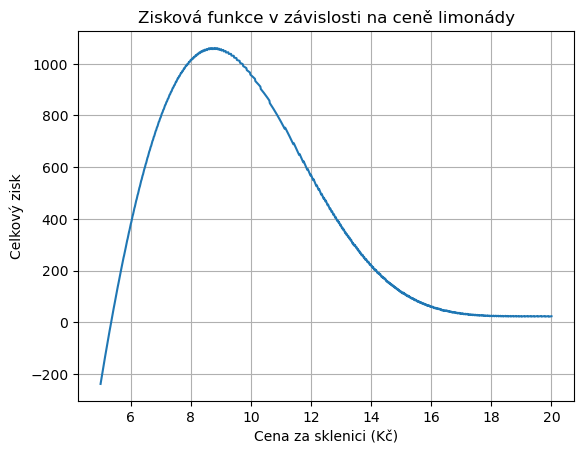

In [3]:
p = np.linspace(5, 20, 1000)
q = np.floor(1000 * np.exp(-(p / 10)**2))
c = 5 + 15 * np.exp(-q / 200)
z = p - c
t = z * q


# Vykreslení grafu
plt.plot(p, t)
plt.xlabel('Cena za sklenici (Kč)')
plt.ylabel('Celkový zisk')
plt.title('Zisková funkce v závislosti na ceně limonády')
plt.grid(True)
plt.show()

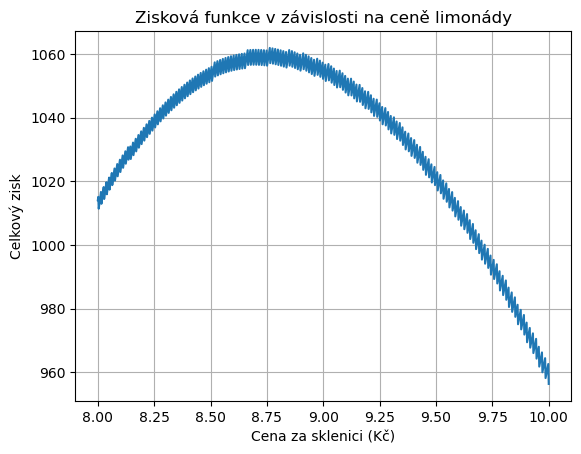

In [4]:
# Vykreslení grafu pouze okolo řešení, dejme tomu [8, 10]

p = np.linspace(8, 10, 1000)
q = np.floor(1000 * np.exp(-(p / 10)**2))
c = 5 + 15 * np.exp(-q / 200)
z = p - c
t = z * q

plt.plot(p, t)
plt.xlabel('Cena za sklenici (Kč)')
plt.ylabel('Celkový zisk')
plt.title('Zisková funkce v závislosti na ceně limonády')
plt.grid(True)
plt.show()

Naše aproximace řešení je tedy následující:

In [5]:
max_t = np.max(t)
max_t_idx = np.argmax(t)
p_star = p[max_t_idx]
q_star = q[max_t_idx]

print(f"Optimální cena je {p_star:.2f} Kč a optimální množství je {q_star:.0f} sklenic.")

Optimální cena je 8.76 Kč a optimální množství je 464 sklenic.


## Část 2: Metoda nejmenších čtverců a určování zahraných not

In [449]:
from scipy.io import wavfile
import numpy as np

res = []
window_length_seconds = 0.1
window_length_samples = int(window_length_seconds * 44100)

for j in range(1,89):
    file_path = f"notes/t{j}.wav"
    sample_rate, audio_data = wavfile.read(file_path)
    audio_data = audio_data
    audio_data_fft = np.abs(np.fft.rfft(audio_data[:window_length_samples]) / window_length_samples)
    audio_data_fft = audio_data_fft
    res.append(audio_data_fft)
    # Process the audio data here

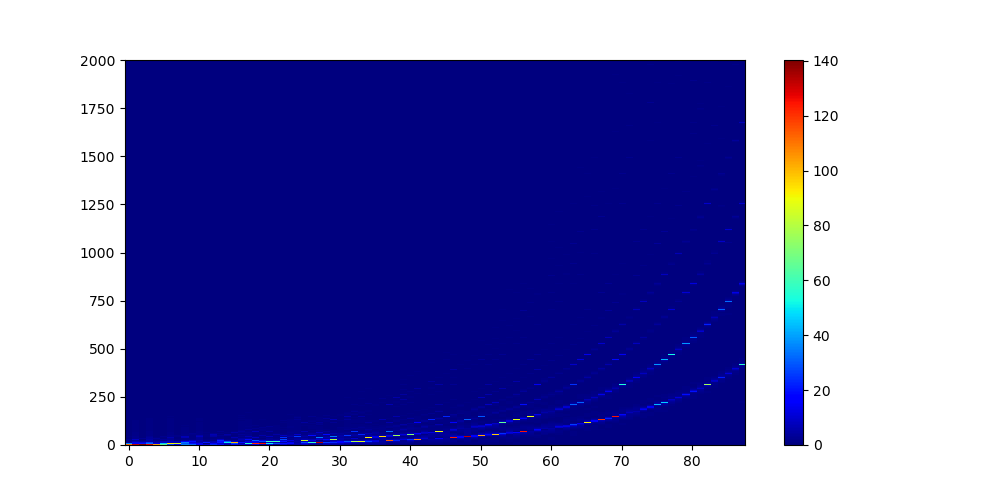

In [450]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(np.vstack(res).T, cmap='jet', aspect='auto', origin='lower', interpolation='none')
plt.ylim(0, 2000)
plt.colorbar()
plt.show()

In [451]:
mat = np.vstack(res).T
minsq_mat = mat.T @ mat

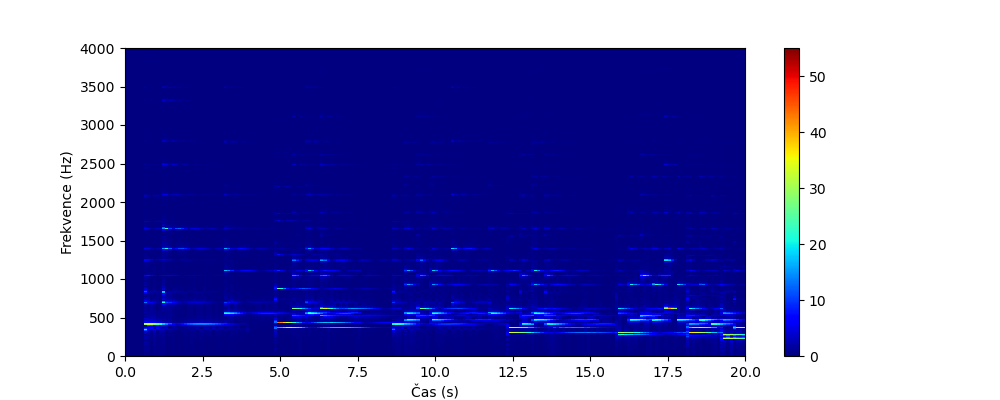

In [453]:
from scipy import signal as sgn
from scipy.io import wavfile

vzorkovaci_frekvence, signal = wavfile.read('lune1.wav')
delka_nahravky = len(signal) / vzorkovaci_frekvence

signal = signal

delka_okna_sekundy = 0.1
posun_okna_sekundy = 0.1

velikost_okna = int(delka_okna_sekundy * vzorkovaci_frekvence)
posun_okna = int(posun_okna_sekundy * vzorkovaci_frekvence)

window = np.ones((velikost_okna,))  # pokud chceme obdélníkové okno stejné jako předtím

# výpočet spektrogramu
y_axis, x_axis, casove_frekvencni_matice = sgn.spectrogram(signal,
                                                           fs=vzorkovaci_frekvence,
                                                           window=window,
                                                           #nfft=vzorkovaci_frekvence,
                                                           nperseg=velikost_okna,
                                                           noverlap=velikost_okna - posun_okna,
                                                           scaling='spectrum',  # přeškálování barev
                                                           mode='magnitude')  # amplituda


casove_frekvencni_matice = casove_frekvencni_matice

plt.figure(figsize=(10, 4))
plt.pcolormesh(x_axis, y_axis, casove_frekvencni_matice, cmap='jet')
plt.colorbar()
plt.xlabel('Čas (s)')
plt.ylabel('Frekvence (Hz)')

plt.ylim(0, 4000)

plt.show()

In [454]:
rhs = mat.T @ casove_frekvencni_matice
rhs.shape

(88, 200)

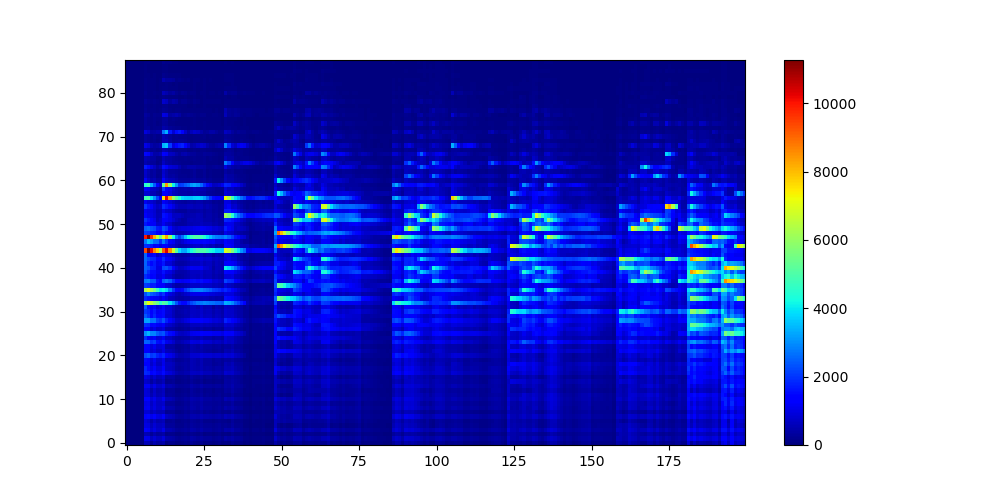

In [455]:
plt.figure(figsize=(10, 5))
plt.imshow(rhs, cmap='jet', aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.show()

In [456]:
solutions = np.linalg.solve(minsq_mat, rhs)


In [457]:
solutions.shape

(88, 200)

<function matplotlib.pyplot.show(block=None)>

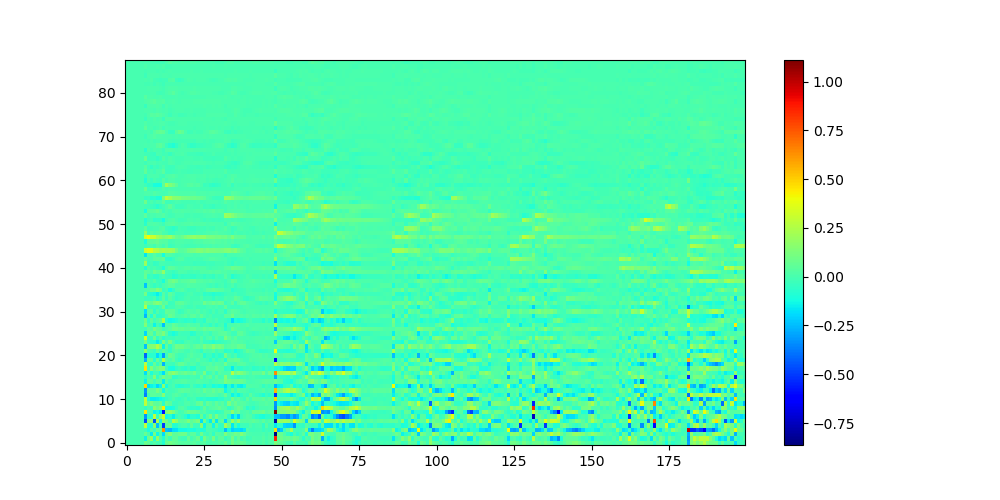

In [458]:
plt.figure(figsize=(10, 5))
plt.imshow(solutions, cmap='jet', aspect='auto', origin='lower')
plt.colorbar()
plt.show

In [466]:
from scipy.optimize import minimize

solutions2 = np.zeros_like(solutions)
residuals = np.zeros(solutions.shape[1])
A = minsq_mat # Replace with your A matrix

bounds = [(0, None) for _ in range(A.shape[0])]
# Objective function



for j in range(solutions.shape[1]):
    print(f"Iteration {j+1} of {solutions.shape[1]}.")
    x0 = solutions[:,j]*0
    x0[x0 < 0] = 0
    b = rhs[:,j]    # Replace with your b vector
    def objective(x):
        #residual = 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x) + np.dot(b.T, b)
        residual = (mat @ x - casove_frekvencni_matice[:,j])
        res_sq = np.dot(residual.T, residual)
        return res_sq
    
    res_min = minimize(objective, x0, bounds=bounds, method='SLSQP')
    tmp = res_min.x
    print(f"Residual: {res_min.fun:.2f}")
    solutions2[:,j] = tmp
    residuals[j] = res_min.fun

Iteration 1 of 200.
Residual: 0.00
Iteration 2 of 200.
Residual: 0.00
Iteration 3 of 200.
Residual: 0.00
Iteration 4 of 200.
Residual: 0.00
Iteration 5 of 200.
Residual: 0.00
Iteration 6 of 200.
Residual: 0.00
Iteration 7 of 200.
Residual: 695.84
Iteration 8 of 200.
Residual: 213.69
Iteration 9 of 200.
Residual: 431.22
Iteration 10 of 200.
Residual: 465.57
Iteration 11 of 200.
Residual: 681.63
Iteration 12 of 200.
Residual: 558.86
Iteration 13 of 200.
Residual: 1138.36
Iteration 14 of 200.
Residual: 232.56
Iteration 15 of 200.
Residual: 320.75
Iteration 16 of 200.
Residual: 320.32
Iteration 17 of 200.
Residual: 105.70
Iteration 18 of 200.
Residual: 52.97
Iteration 19 of 200.
Residual: 49.30
Iteration 20 of 200.
Residual: 42.88
Iteration 21 of 200.
Residual: 83.64
Iteration 22 of 200.
Residual: 124.33
Iteration 23 of 200.
Residual: 126.82
Iteration 24 of 200.
Residual: 104.21
Iteration 25 of 200.
Residual: 78.05
Iteration 26 of 200.
Residual: 82.28
Iteration 27 of 200.
Residual: 74.98
I

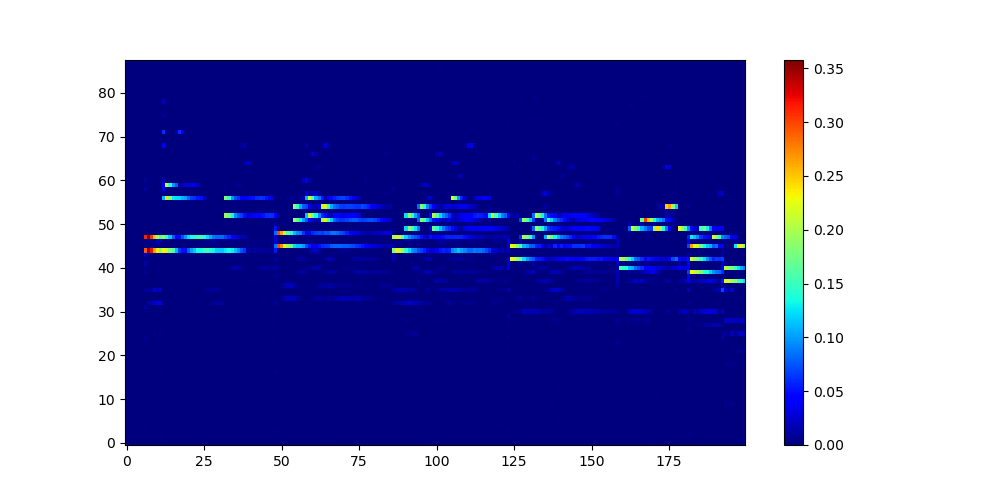

In [467]:
plt.figure(figsize=(10, 5))
plt.imshow(solutions2, cmap='jet', aspect='auto', origin='lower')
plt.colorbar()
plt.show()

In [462]:
casove_frekvencni_matice.shape

(2206, 200)

In [472]:
from scipy.optimize import minimize

solutions3 = np.zeros_like(solutions)
A = minsq_mat  # Replace with your A matrix

bounds = [(0, None) for _ in range(A.shape[0])]
# Objective function
min_sqr_last=1

last_notes = np.ones((88, ), dtype=bool)
for j in range(solutions.shape[1]):
    print(f"Iteration {j+1} of {solutions.shape[1]}.")
    x0 = solutions2[:, j]
    x0[x0 < 0.1] = 1e-6
    b = rhs[:, j]    # Replace with your b vector

    def objective(x):
        residual = (mat @ x - casove_frekvencni_matice[:, j])
        res_sq = np.dot(residual.T, residual)
        penalta = residuals[j] *0.2* np.sum(np.tanh(1e3 * x[last_notes]))
        return res_sq + penalta

    res_min = minimize(objective, x0, bounds=bounds, method='SLSQP')
    tmp = res_min.x
    last_notes = tmp < 0.01
    print(f"Residual: {res_min.fun:.2f}")
    solutions3[:, j] = tmp
    min_sqr_last = 0.5 * np.dot(tmp.T, np.dot(A, tmp)) - np.dot(b.T, tmp) + np.dot(b.T, b)

Iteration 1 of 200.
Residual: 0.00
Iteration 2 of 200.
Residual: 0.00
Iteration 3 of 200.
Residual: 0.00
Iteration 4 of 200.
Residual: 0.00
Iteration 5 of 200.
Residual: 0.00
Iteration 6 of 200.
Residual: 0.00
Iteration 7 of 200.
Residual: 1048.27
Iteration 8 of 200.
Residual: 226.87
Iteration 9 of 200.
Residual: 447.69
Iteration 10 of 200.
Residual: 521.52
Iteration 11 of 200.
Residual: 731.70
Iteration 12 of 200.
Residual: 629.68
Iteration 13 of 200.
Residual: 1650.40
Iteration 14 of 200.
Residual: 282.85
Iteration 15 of 200.
Residual: 326.21
Iteration 16 of 200.
Residual: 600.95
Iteration 17 of 200.
Residual: 118.48
Iteration 18 of 200.
Residual: 117.82
Iteration 19 of 200.
Residual: 70.49
Iteration 20 of 200.
Residual: 44.38
Iteration 21 of 200.
Residual: 87.13
Iteration 22 of 200.
Residual: 143.49
Iteration 23 of 200.
Residual: 139.75
Iteration 24 of 200.
Residual: 115.07
Iteration 25 of 200.
Residual: 80.59
Iteration 26 of 200.
Residual: 86.39
Iteration 27 of 200.
Residual: 77.56

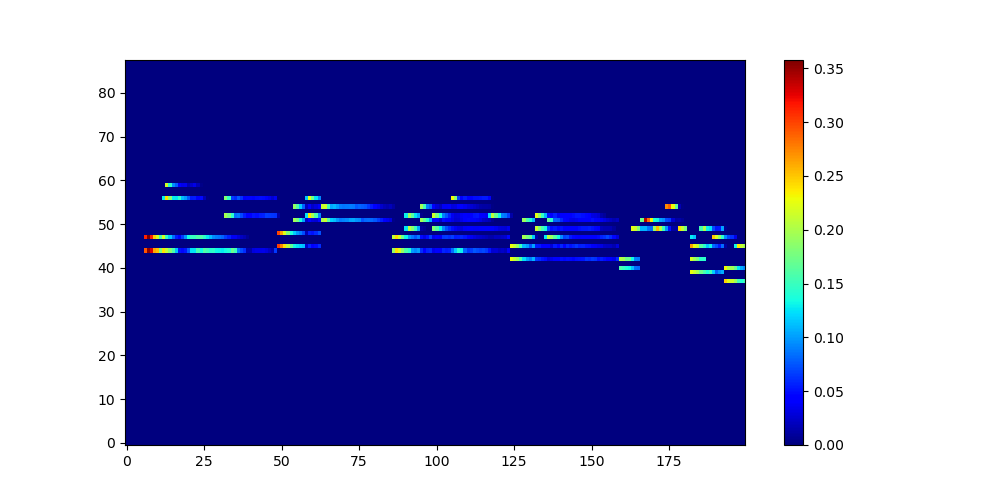

In [473]:
plt.figure(figsize=(10, 5))
plt.imshow(solutions3, cmap='jet', aspect='auto', origin='lower')
plt.colorbar()
plt.show()

In [507]:
j=20
print(f"Iteration {j+1} of {solutions.shape[1]}.")
x0 = solutions2[:, j]
x0[x0 < 10] = 0
b = rhs[:, j]    # Replace with your b vector

def objective(x):
    min_sqr =  0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x) + np.dot(b.T, b)
    penalta = 1e5*np.sum(1 - np.exp(-100 * x))
    return min_sqr + penalta

res_min = minimize(objective, x0, bounds=bounds, method='SLSQP')
res_min

Iteration 21 of 70.


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 36323266794.80794
       x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
     nit: 1
     jac: [ 9.995e+06  9.991e+06 ...  1.000e+07  1.000e+07]
    nfev: 89
    njev: 1

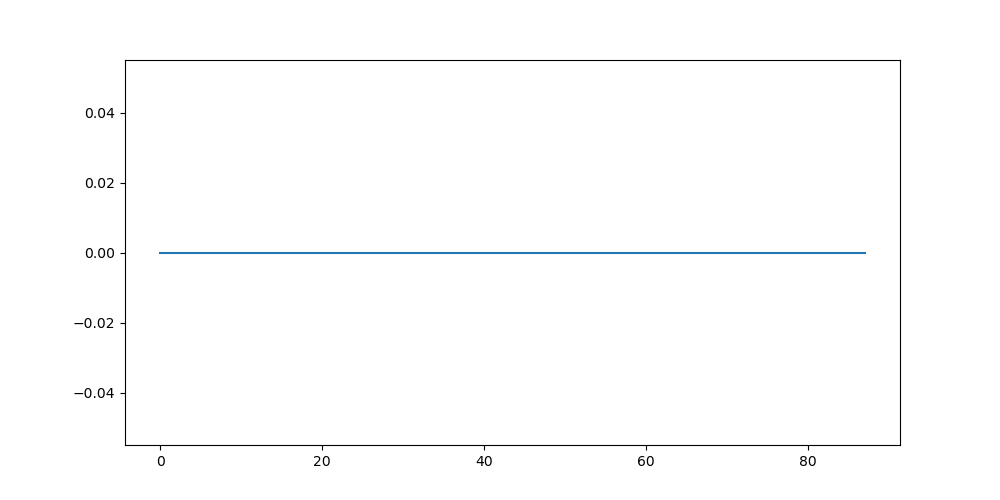

In [508]:
plt.figure(figsize=(10, 5))
plt.plot(res_min.x)
plt.show()

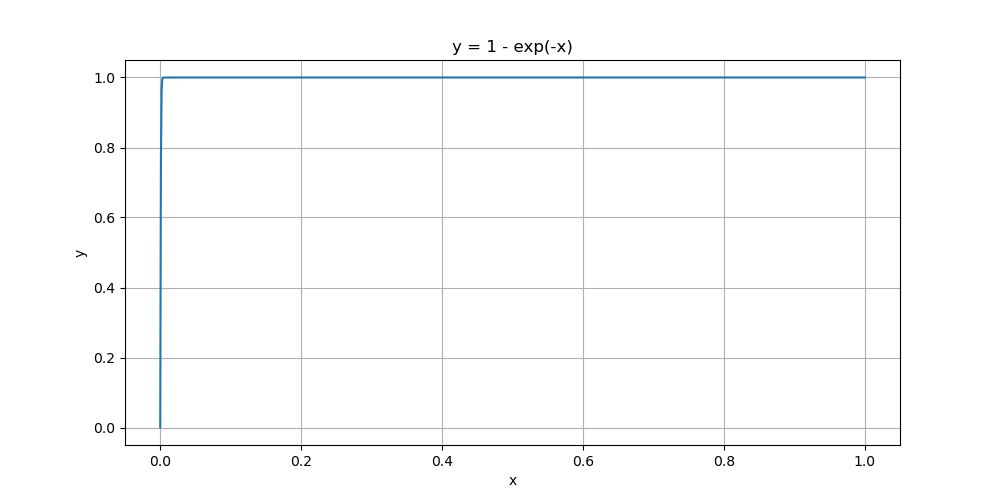

In [362]:
x = np.linspace(0, 1, 1000)
y = np.tanh(1000*x)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = 1 - exp(-x)')
plt.grid(True)
plt.show()

In [78]:
def piano_frequencies():
    """
    Generates an array of frequencies for the 88 keys of a piano.
    """
    frequencies = []
    for key in range(1, 89):  # Piano keys numbered from 1 to 88
        frequency = 2 ** ((key - 49) / 12) * 440  # Formula for frequency calculation
        frequencies.append(frequency)
    return frequencies


piano_note_frequencies = piano_frequencies()
print(piano_note_frequencies)

[27.5, 29.13523509488062, 30.86770632850775, 32.70319566257483, 34.64782887210901, 36.70809598967594, 38.890872965260115, 41.20344461410875, 43.653528929125486, 46.2493028389543, 48.999429497718666, 51.91308719749314, 55.0, 58.27047018976124, 61.7354126570155, 65.40639132514966, 69.29565774421802, 73.41619197935188, 77.78174593052023, 82.4068892282175, 87.30705785825097, 92.4986056779086, 97.99885899543733, 103.82617439498628, 110.0, 116.54094037952248, 123.47082531403103, 130.8127826502993, 138.59131548843604, 146.8323839587038, 155.56349186104046, 164.81377845643496, 174.61411571650194, 184.9972113558172, 195.99771799087463, 207.65234878997256, 220.0, 233.08188075904496, 246.94165062806206, 261.6255653005986, 277.1826309768721, 293.6647679174076, 311.1269837220809, 329.6275569128699, 349.2282314330039, 369.9944227116344, 391.99543598174927, 415.3046975799451, 440.0, 466.1637615180899, 493.8833012561241, 523.2511306011972, 554.3652619537442, 587.3295358348151, 622.2539674441618, 659.2

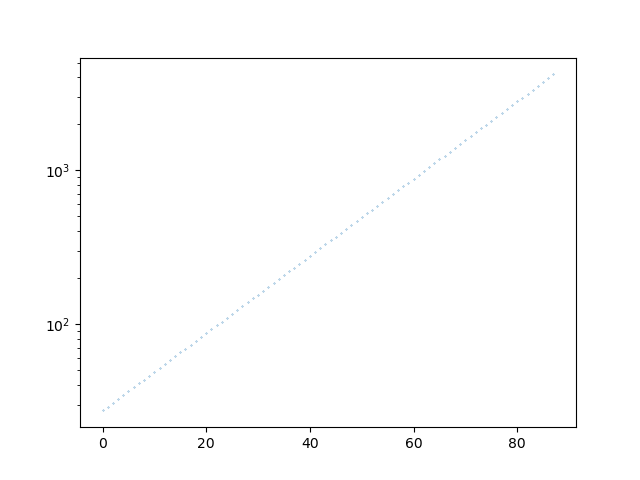

In [79]:
plt.figure()
plt.plot(piano_note_frequencies,'.', markersize=0.5)
plt.yscale('log')

plt.show()

In [80]:
from scipy.io import wavfile
import numpy as np

res = []
window_length_seconds = 1
window_length_samples = int(window_length_seconds * 44100)

j=10
file_path = f"notes/t{j}.wav"
sample_rate, audio_data = wavfile.read(file_path)
audio_data = audio_data / 150
audio_data_fft = np.abs(np.fft.rfft(audio_data[:window_length_samples]) / window_length_samples)
audio_data_fft = audio_data_fft
res.append(audio_data_fft)
# Process the audio data here

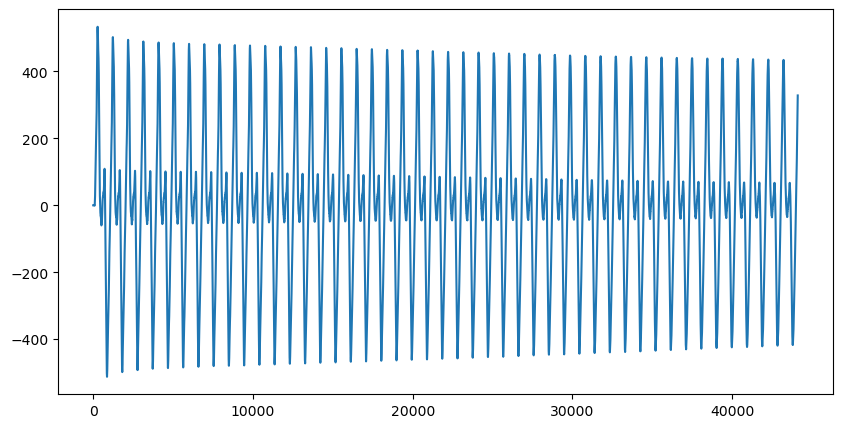

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(audio_data)
plt.show()

In [91]:
x = np.linspace(0, 0.1, int(sample_rate/10), endpoint=False)
delka_vzorku = 1/sample_rate
fourier_transform_sin = np.zeros((88,len(x)))
fourier_transform_cos = np.zeros((88,len(x)))

for i, freq in enumerate(piano_note_frequencies):
    fourier_transform_sin[i, :] = np.sin(2 * np.pi * freq * x)
    fourier_transform_cos[i, :] = np.cos(2 * np.pi * freq * x)

In [573]:
np.sqrt((fourier_transform_sin @ audio_data)**2 + (fourier_transform_cos @ audio_data)**2)

array([2.51403520e+02, 1.50286580e+02, 3.20732147e+02, 6.20212472e+01,
       2.57702030e+02, 5.26250485e+01, 2.77750527e+02, 9.20288070e+01,
       2.16661963e+02, 2.04105817e+02, 4.95529843e+01, 1.91415715e+02,
       1.74578623e+02, 1.58073028e+02, 1.27909704e+02, 1.20459027e+02,
       8.83401519e+01, 1.00852101e+02, 7.40051577e+01, 1.20893393e+02,
       1.89664080e+02, 1.18489873e+02, 7.48468947e+01, 1.51821520e+02,
       1.05946528e+02, 1.65166852e+02, 1.35126529e+02, 1.43910248e+02,
       1.37413568e+02, 1.00633938e+02, 9.47544218e+01, 1.49081464e+02,
       1.63213237e+02, 1.39205025e+02, 1.38227039e+02, 1.48051859e+02,
       1.60291214e+02, 1.56333753e+02, 1.58587418e+02, 1.28562264e+02,
       1.44654887e+02, 1.39485726e+02, 1.47972993e+02, 1.35220528e+02,
       1.22354554e+02, 1.29472205e+02, 1.58860311e+02, 1.09777690e+02,
       1.23509613e+02, 1.51521434e+02, 1.37379465e+02, 1.47345395e+02,
       1.50184585e+02, 1.06287168e+02, 1.51660397e+02, 1.30913338e+02,
      

In [82]:
all_notes = []
for i in range(1, 89):
    file_path = f"notes/t{i}.wav"
    sample_rate, audio_data = wavfile.read(file_path)
    #audio_data = audio_data[:int(0.25 * sample_rate)]
    audio_data = audio_data / 150
    audio_data = audio_data / np.max(audio_data)
    rs_notes = np.sqrt((fourier_transform_sin @ audio_data * delka_vzorku)**2 +
                       (fourier_transform_cos @ audio_data * delka_vzorku)**2)
    all_notes.append(np.array(rs_notes))

In [83]:
delka_vzorku

2.2675736961451248e-05

In [609]:
x = np.linspace(0, 0.25, int(sample_rate/4), endpoint=False)

all_notes = []
for i in range(1,89):
    file_path = f"notes/t{i}.wav"
    sample_rate, audio_data = wavfile.read(file_path)
    audio_data = audio_data[:int(0.25 * sample_rate)]
    rs_notes = []
    for freq in piano_note_frequencies:
        sin_w = np.sin(2 * np.pi * freq * x)
        cos_w = np.cos(2 * np.pi * freq * x)
        rs_notes.append(np.sqrt(np.trapz(sin_w * audio_data, x) ** 2 + np.trapz(cos_w * audio_data, x) ** 2))
        
    all_notes.append(np.array(rs_notes))

In [85]:
notes = np.vstack(all_notes).T
notes.shape

(88, 88)

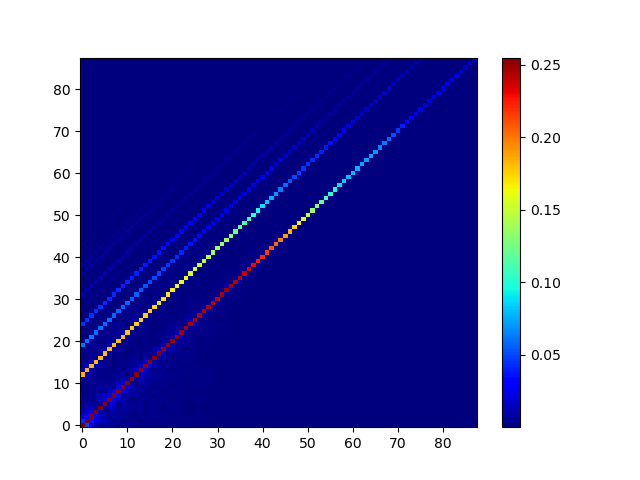

In [86]:
plt.figure()
plt.imshow(notes, cmap='jet', aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.show()

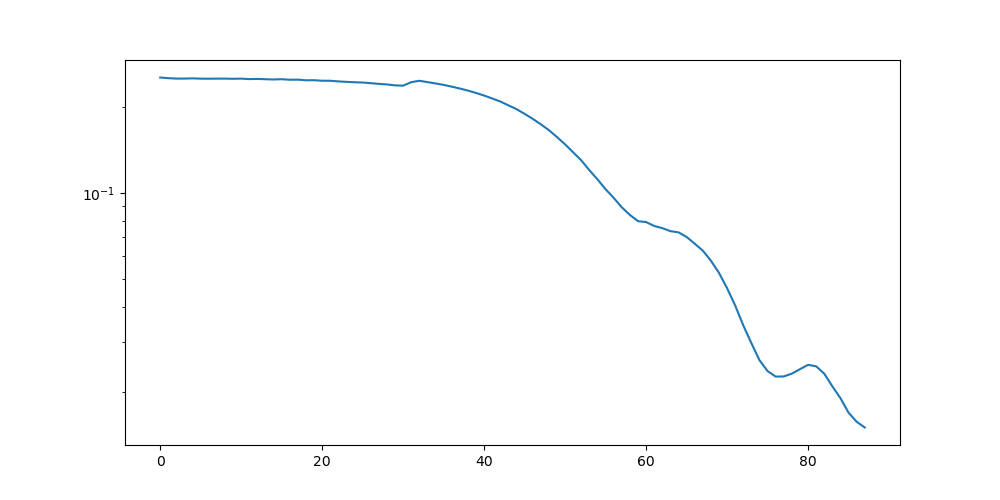

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(np.diag(notes))
plt.yscale('log')
plt.show()

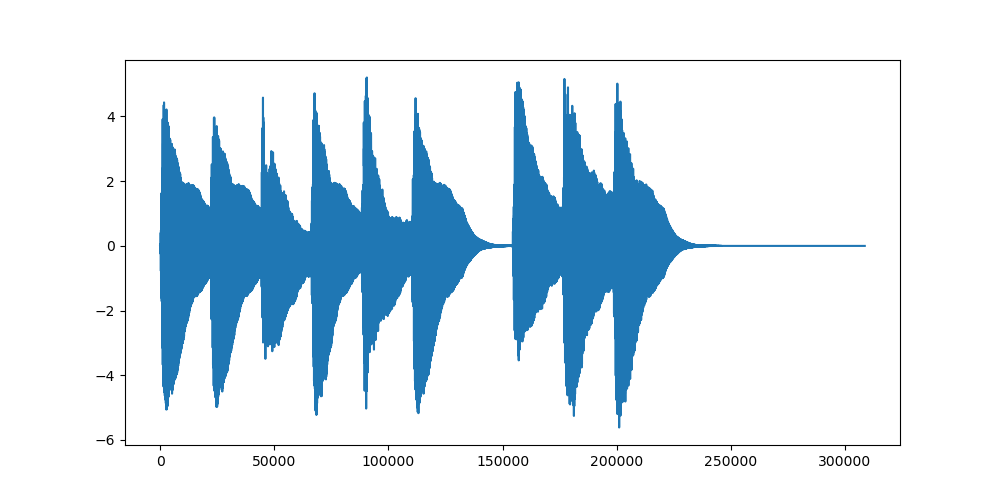

In [88]:
vzorkovaci_frekvence, signal = wavfile.read('butterfly3.wav')
delka_nahravky = len(signal) / vzorkovaci_frekvence
signal = signal/400
plt.figure(figsize=(10, 5))
plt.plot(signal)
plt.show()

In [95]:
signal_mat = signal.reshape(-1, int(vzorkovaci_frekvence / 10)).T

In [96]:
signal_mat.shape

(4410, 70)

In [97]:
spectrogram_new = np.sqrt((fourier_transform_sin @ signal_mat * delka_vzorku)
                          ** 2 + (fourier_transform_cos @ signal_mat * delka_vzorku)**2)

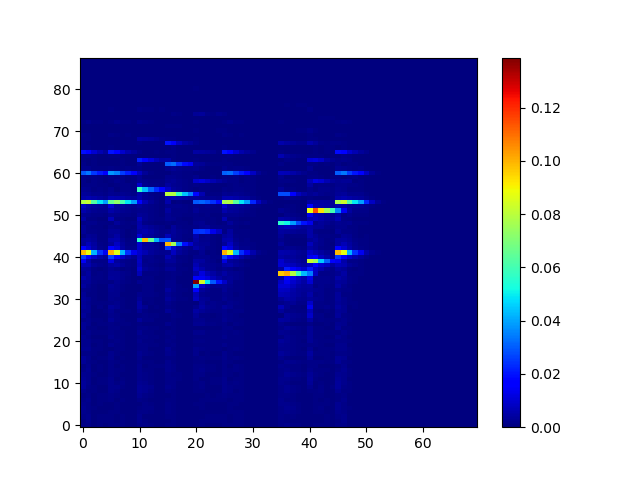

In [98]:
plt.figure()
plt.imshow(spectrogram_new, cmap='jet', aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.show()

In [100]:
A = notes.T @ notes

rhs = notes.T @ spectrogram_new


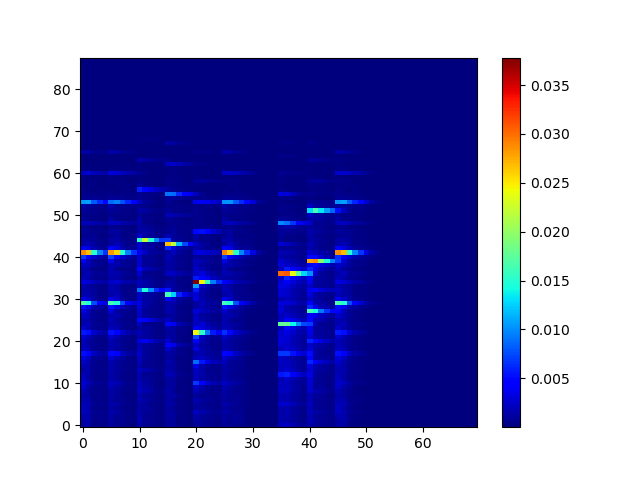

In [101]:
plt.figure()
plt.imshow(rhs, cmap='jet', aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.show()

In [102]:
x = np.linalg.solve(A,rhs)

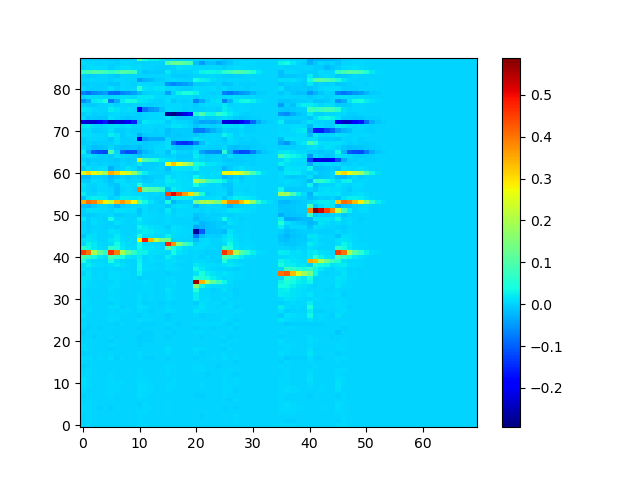

In [103]:
plt.figure()
plt.imshow(x, cmap='jet', aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.show()

In [107]:
from scipy.optimize import minimize

solutions2 = np.zeros_like(x)

bounds = [(0, None) for _ in range(A.shape[0])]
# Objective function


for j in range(x.shape[1]):
    print(f"Iteration {j+1} of {solutions.shape[1]}.")
    x0 = x[:, j]
    x0[x0 < 0] = 0
    b = rhs[:, j]    # Replace with your b vector

    def objective(x):
        return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x) + 0.5*np.dot(b.T, b)

    res_min = minimize(objective, x0, bounds=bounds, method='L-BFGS-B')
    tmp = res_min.x
    print(f"Residual: {res_min.fun:.2f}")
    solutions2[:, j] = tmp

Iteration 1 of 70.
Residual: -0.01
Iteration 2 of 70.
Residual: -0.01
Iteration 3 of 70.
Residual: -0.00
Iteration 4 of 70.
Residual: -0.00
Iteration 5 of 70.
Residual: -0.00
Iteration 6 of 70.
Residual: -0.01
Iteration 7 of 70.
Residual: -0.01
Iteration 8 of 70.
Residual: -0.00
Iteration 9 of 70.
Residual: -0.00
Iteration 10 of 70.
Residual: -0.00
Iteration 11 of 70.
Residual: -0.00
Iteration 12 of 70.
Residual: -0.01
Iteration 13 of 70.
Residual: -0.00
Iteration 14 of 70.
Residual: -0.00
Iteration 15 of 70.
Residual: -0.00
Iteration 16 of 70.
Residual: -0.01
Iteration 17 of 70.
Residual: -0.01
Iteration 18 of 70.
Residual: -0.00
Iteration 19 of 70.
Residual: -0.00
Iteration 20 of 70.
Residual: -0.00
Iteration 21 of 70.
Residual: -0.01
Iteration 22 of 70.
Residual: -0.00
Iteration 23 of 70.
Residual: -0.00
Iteration 24 of 70.
Residual: -0.00
Iteration 25 of 70.
Residual: -0.00
Iteration 26 of 70.
Residual: -0.01
Iteration 27 of 70.
Residual: -0.01
Iteration 28 of 70.
Residual: -0.00
I

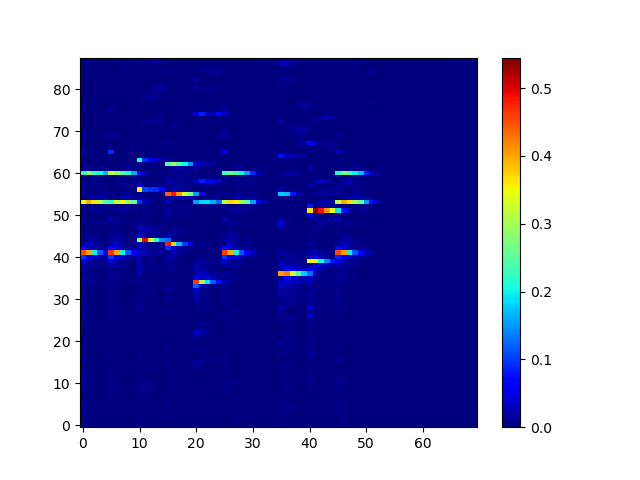

In [108]:
plt.figure()
plt.imshow(solutions2, cmap='jet', aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.show()

In [115]:
from scipy.optimize import minimize

solutions3 = np.zeros_like(x)
#A = minsq_mat  # Replace with your A matrix

bounds = [(0, None) for _ in range(A.shape[0])]
# Objective function


for j in range(x.shape[1]):
    print(f"Iteration {j+1} of {x.shape[1]}.")
    x0 = solutions2[:, j]
    #x0[x0 < 0.2] = 0
    b = rhs[:, j]    # Replace with your b vector

    def objective(x):
        min_sqr = 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x) + np.dot(b.T, b)
        penalta = 0.01*np.sum(1 - np.exp(-1 * x))
        return min_sqr + penalta

    res_min = minimize(objective, x0, bounds=bounds, method='L-BFGS-B')
    tmp = res_min.x
    print(f"Residual: {res_min.fun:.2f}")
    solutions3[:, j] = tmp

Iteration 1 of 70.
Residual: -0.00
Iteration 2 of 70.
Residual: -0.00
Iteration 3 of 70.
Residual: 0.00
Iteration 4 of 70.
Residual: 0.00
Iteration 5 of 70.
Residual: 0.00
Iteration 6 of 70.
Residual: -0.00
Iteration 7 of 70.
Residual: -0.00
Iteration 8 of 70.
Residual: 0.00
Iteration 9 of 70.
Residual: 0.00
Iteration 10 of 70.
Residual: 0.00
Iteration 11 of 70.
Residual: 0.00
Iteration 12 of 70.
Residual: -0.00
Iteration 13 of 70.
Residual: -0.00
Iteration 14 of 70.
Residual: 0.00
Iteration 15 of 70.
Residual: 0.00
Iteration 16 of 70.
Residual: -0.00
Iteration 17 of 70.
Residual: -0.00
Iteration 18 of 70.
Residual: 0.00
Iteration 19 of 70.
Residual: 0.00
Iteration 20 of 70.
Residual: 0.00
Iteration 21 of 70.
Residual: -0.00
Iteration 22 of 70.
Residual: -0.00
Iteration 23 of 70.
Residual: 0.00
Iteration 24 of 70.
Residual: 0.00
Iteration 25 of 70.
Residual: 0.00
Iteration 26 of 70.
Residual: -0.00
Iteration 27 of 70.
Residual: -0.00
Iteration 28 of 70.
Residual: 0.00
Iteration 29 of 7

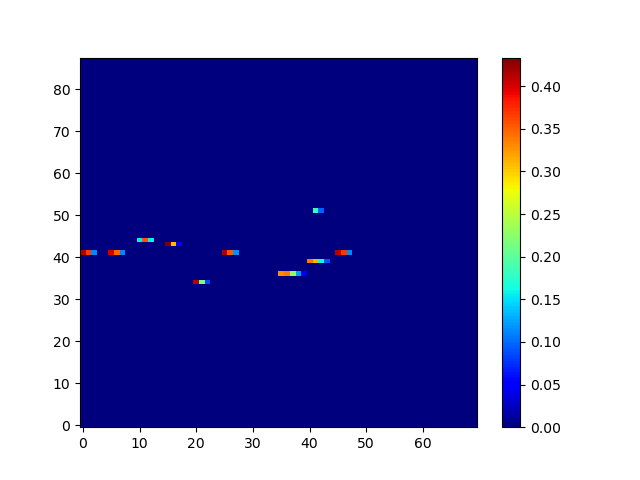

In [116]:
plt.figure()
plt.imshow(solutions3, cmap='jet', aspect='auto', origin='lower', interpolation='none')
plt.colorbar()
plt.show()

In [658]:
res_min

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 7.892071674444546e-12
       x: [ 0.000e+00  6.128e-17 ...  4.494e-19  0.000e+00]
     nit: 2
     jac: [ 9.999e-03  9.999e-03 ...  1.000e-02  1.000e-02]
    nfev: 178
    njev: 2